# About the Project
This project offers a thorough examination of the electric vehicle market, with a primary focus on the EV two-wheelers market in India. It emphasizes segmentation based on sales data, customer feedback, and technical specifications.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

# Sales Data
Sales data covering electric vehicles from 2017 to 2024 has been sourced from the Society of Manufacturers of Electric Vehicles. The dataset encompasses sales figures for electric two-wheelers, three-wheelers, four-wheelers, and buses, offering a detailed perspective on market dynamics and consumer choices throughout the specified period.

In [3]:
data_smev = pd.read_excel("2w_data.xlsx", sheet_name=None)

In [4]:
data_smev.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV 2W FY 23-24', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'EV Industries', 'Electric 2-Wheeler Sales'])

In [5]:
data_smev['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-2 Wheelers,2023-24,944126
7,E-3 Wheelers,2017-18,91970
8,E-3 Wheelers,2018-19,116031
9,E-3 Wheelers,2019-20,143051


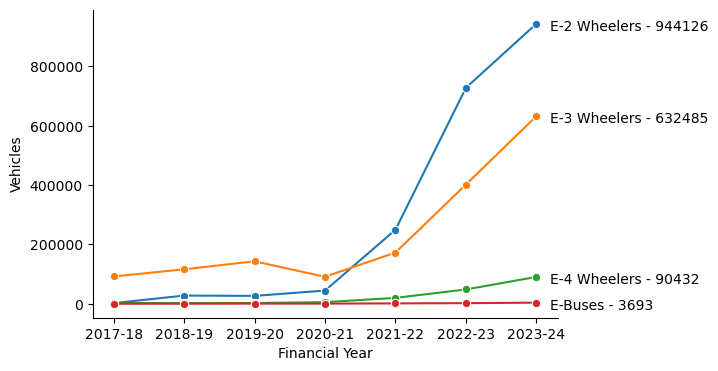

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=data_smev['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

# Annotate the last data point
for col in data_smev['EV Industries']['category'].unique():
    last_point = data_smev['EV Industries'][data_smev['EV Industries']['category'] == col].iloc[-1]
    plt.annotate(f"{last_point['category']} - {last_point['num_vehicles']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
# plt.show()

*The presented ↑ figure highlights the significant growth path of **India's two-wheeler market in 2024**, emphasizing its dominant position in the industry with the recorded sale of **944126**.*

In [7]:
data_smev['EV Market'] = data_smev['EV Market'].sort_values(by='Amount INR Cr', ascending = False)

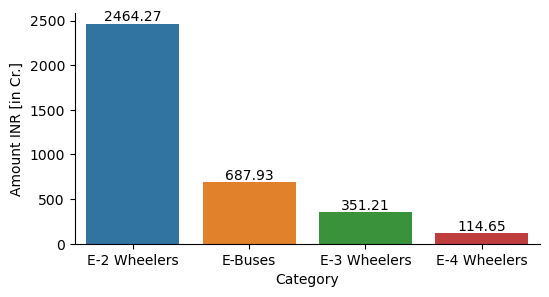

In [8]:
fig, ax = plt.subplots(figsize = (6, 3))
ax = sns.barplot(data_smev['EV Market'], x = 'Category', y = 'Amount INR Cr')
ax.bar_label(ax.containers[0])
plt.ylabel("Amount INR [in Cr.]")
ax.spines[['right', 'top']].set_visible(False)

*The Above figure delves into the financial aspect of the market, illustrating the industry's total value in crores. Particularly, **two-wheelers emerged as the principal revenue contributors with 2464.27 Cr. according to the Society of Manufacturers of Electric Vehicles 2022 report**, underscoring their economic importance.*

In [9]:
ev2w = list(data_smev.keys())[0:5]
data_ev2w = pd.concat([data_smev[ev2w[0]], data_smev[ev2w[1]], data_smev[ev2w[2]], data_smev[ev2w[3]], data_smev[ev2w[4]]])

In [10]:
data_ev2w['maker'] = data_ev2w['maker'].str.upper()

In [11]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BATTRE ELECTRIC', 'BEING INDIA', 'BENLING', 'BGAUSS',
       'HERO ELECTRIC', 'JITENDRA', 'JITENDRA NEW EV', 'KINETIC GREEN',
       'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH', 'OLA ELECTRIC',
       'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [12]:
# Define a dictionary for replacement
replace_dict = {
    'AMPERE VEHICLES': 'AMPERE',
    'ATHER ENERGY': 'ATHER',
    'BEING INDIA': 'BENLING',
    'JITENDRA NEW EV': 'JITENDRA',
    'OKINAWA AUTOTECH': 'OKINAWA'
}

# Replace values using the dictionary
data_ev2w['maker'] = data_ev2w['maker'].replace(replace_dict)


In [13]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BATTRE ELECTRIC', 'BENLING', 'BGAUSS',
       'HERO ELECTRIC', 'JITENDRA', 'KINETIC GREEN', 'OKAYA EV',
       'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'],
      dtype=object)

In [14]:
data_ev2w

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,HERO ELECTRIC,0.30,Apr,1776
1,2019-20,HERO ELECTRIC,0.30,May,455
2,2019-20,HERO ELECTRIC,0.30,Jun,329
3,2019-20,HERO ELECTRIC,0.30,Jul,260
4,2019-20,HERO ELECTRIC,0.30,Aug,249
...,...,...,...,...,...
151,2023-24,OTHERS,0.08,Nov,9826
152,2023-24,OTHERS,0.08,Dec,7785
153,2023-24,OTHERS,0.08,Jan,6746
154,2023-24,OTHERS,0.08,Feb,6229


In [15]:
data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()
print(data_ev2w_year.sort_values('num_vehicles',ascending=False))

   financial_year            maker  num_vehicles
51        2023-24     OLA ELECTRIC        326443
54        2023-24              TVS        182959
37        2022-23     OLA ELECTRIC        152567
43        2023-24            ATHER        108872
44        2023-24            BAJAJ        106990
36        2022-23          OKINAWA         94631
33        2022-23    HERO ELECTRIC         89862
29        2022-23           AMPERE         86351
41        2022-23              TVS         81900
52        2023-24           OTHERS         79622
30        2022-23            ATHER         76837
21        2021-22    HERO ELECTRIC         68936
38        2022-23           OTHERS         56539
42        2023-24           AMPERE         55057
23        2021-22          OKINAWA         46454
31        2022-23            BAJAJ         32559
17        2021-22           AMPERE         25517
25        2021-22           OTHERS         24105
50        2023-24          OKINAWA         20873
18        2021-22   

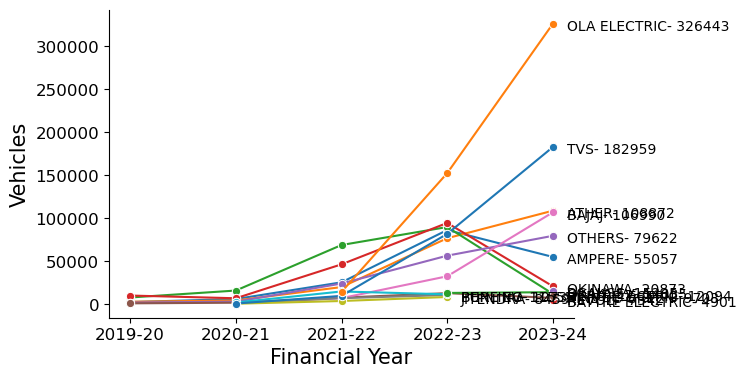

In [85]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')
plt.xlabel("Financial Year", fontsize = 15)
plt.ylabel("Vehicles", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
# plt.legend(title='EV 2W Makers')

# Annotate the last data point
for col in data_ev2w_year['maker'].unique()[::1]:
    last_point = data_ev2w_year[data_ev2w_year['maker'] == col].iloc[-1]
    plt.annotate(f"{last_point['maker']}- {last_point['num_vehicles']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()

*The above figure focused on individual electric two-wheeler companies, highlighting **Ola Electric's dominance as the market leader with the highest recorded sale of 3,26,443 in the 2023-24 financial year**. This underscores their industry leadership and competitiveness in the market.*

# EV Market Segmentation

* The dataset utilized for market segmentation analysis, sourced from bikewale.com, includes customer reviews of electric two-wheelers, providing essential behavioral and psychographic insights. Additionally, it provides comprehensive technical specifications and pricing details for electric two-wheelers. This dataset enabled us to evaluate the technical feasibility and price points essential for our market segmentation strategy.

In [17]:
data_bw = pd.read_csv("ev2w_bikewale.csv")
data_model = pd.read_csv("ev2w_model_spec.csv")

In [18]:
data = data_bw.join(data_model.set_index('Model Name'), on='Model Name', how='left')


In [19]:
data.shape

(844, 20)

In [20]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


<Axes: >

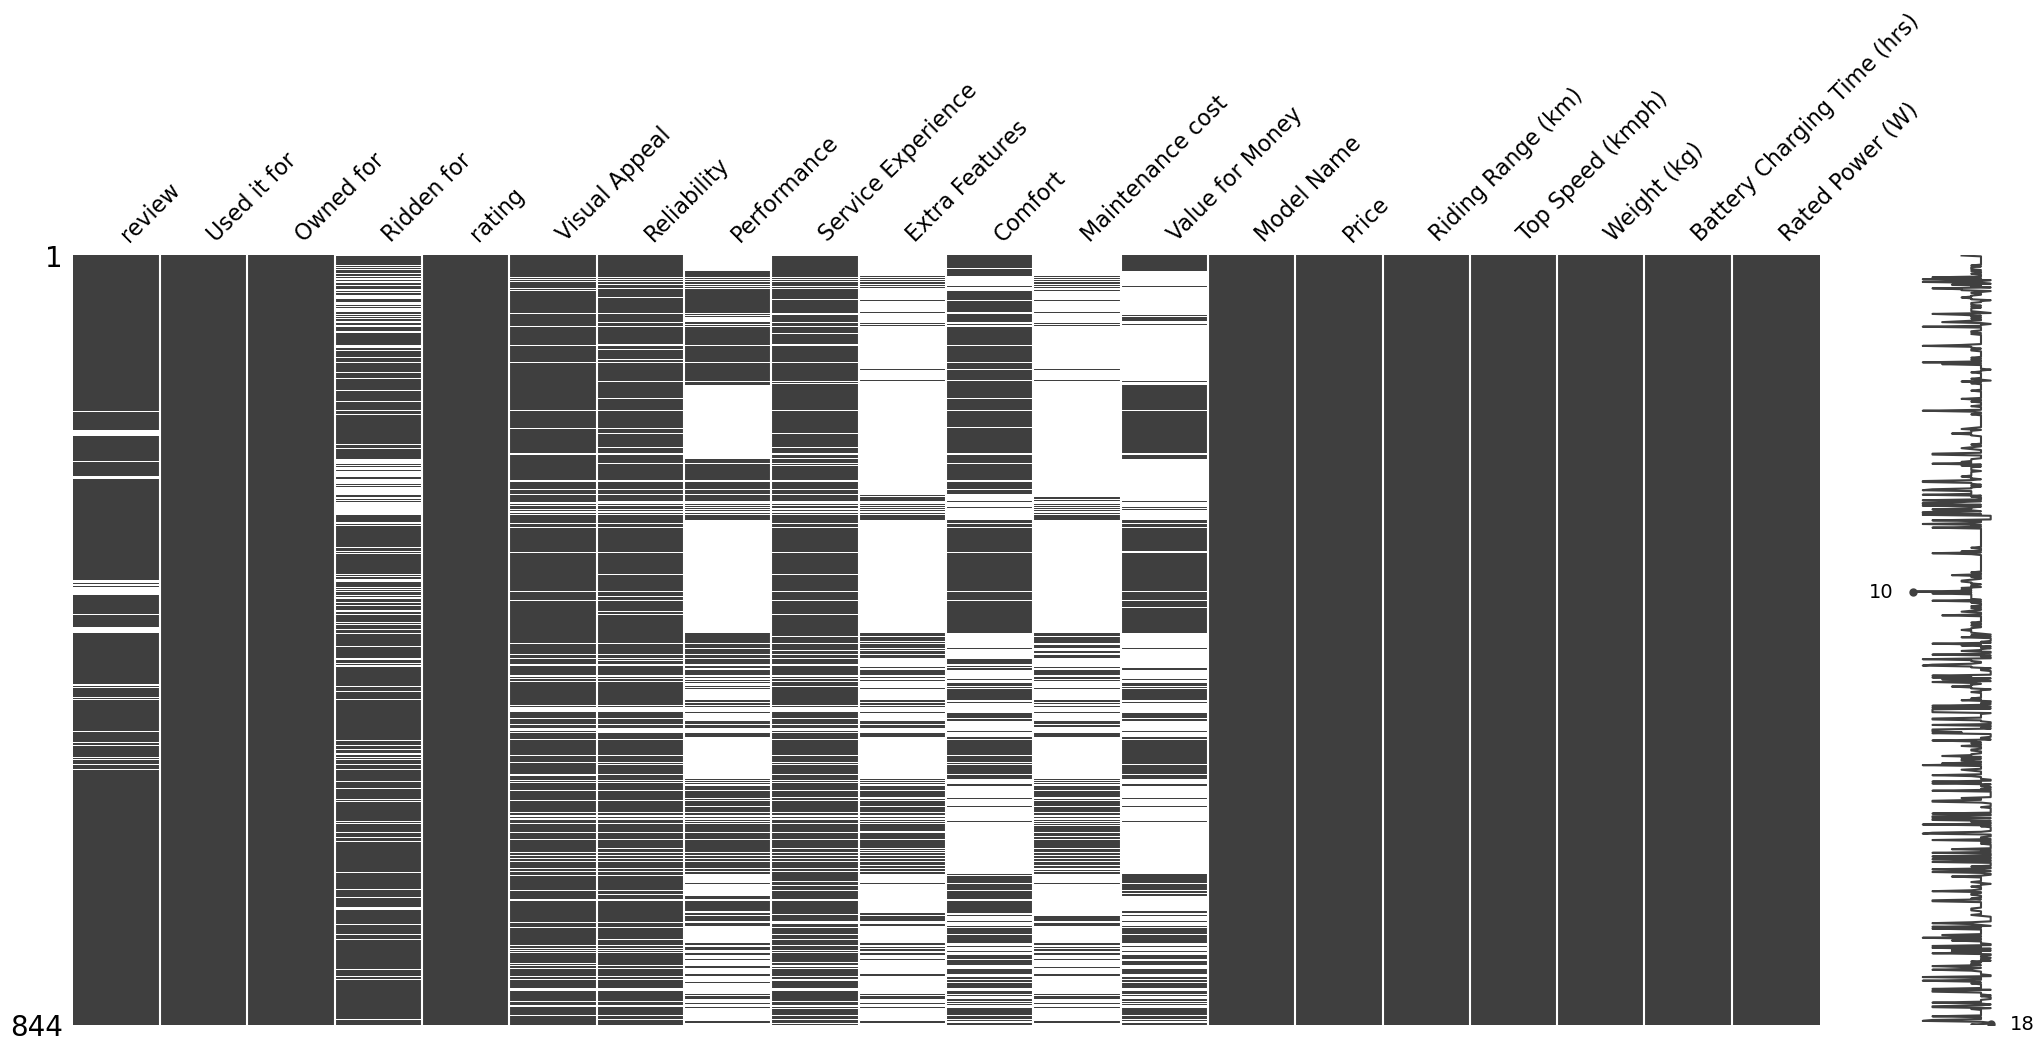

In [21]:
msno.matrix(data)

<Axes: >

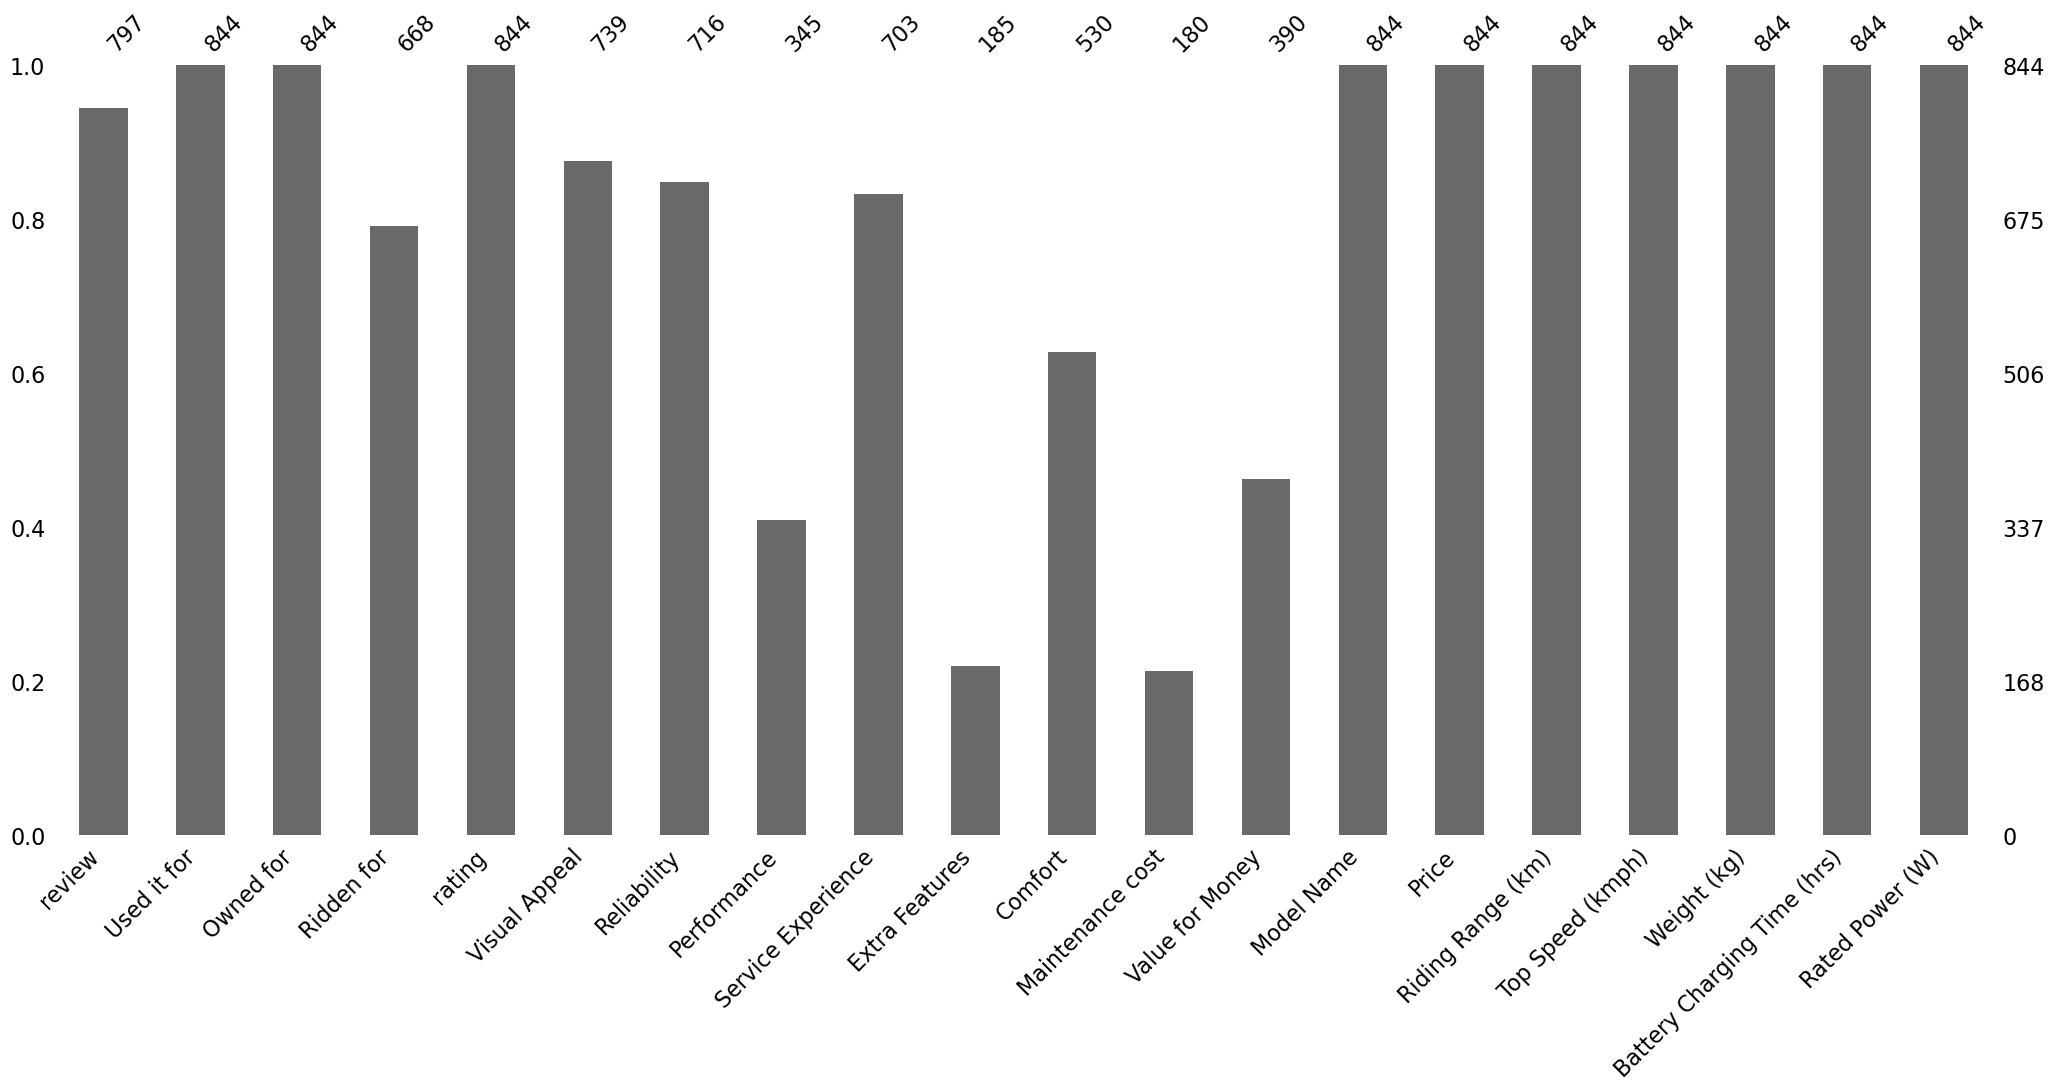

In [22]:
msno.bar(data)

In [23]:
((data.isna().mean()) * 100).sort_values(ascending=False)


Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [25]:
from textblob import TextBlob

def get_sentiment(review_text):
    if pd.isna(review_text):
        return 'neutral'
    blob = TextBlob(review_text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['review'].apply(lambda x: get_sentiment(x))


In [26]:
data['sentiment'].value_counts()

sentiment
positive    587
negative    205
neutral      52
Name: count, dtype: int64

In [27]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,positive
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,positive
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative


In [28]:
data_segment = data.iloc[:, 5:13].copy()

In [29]:
data_segment.head()

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0
1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0
2,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0
3,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0
4,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0


In [30]:
data_segment = data_segment.fillna(0.)

In [ ]:
data_segment.info()

In [32]:
data_segment.head()

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0
1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0
2,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0


In [33]:
data_segment.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

In [34]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)
data_scaled

array([[-0.17424819,  0.63148552, -0.72700963, ...,  0.81528191,
        -0.47280557, -0.28515314],
       [-0.17424819, -0.9626534 , -0.72700963, ...,  0.33543677,
        -0.47280557,  0.72819107],
       [ 0.38922105,  0.63148552, -0.72700963, ...,  1.29512705,
        -0.47280557,  0.22151897],
       ...,
       [-0.73771743, -0.43127376,  1.28974017, ..., -1.10409866,
         0.18030065, -0.79182525],
       [ 0.38922105,  0.63148552, -0.72700963, ...,  0.81528191,
        -0.47280557,  1.74153528],
       [-0.17424819,  0.63148552, -0.72700963, ...,  0.81528191,
        -0.47280557,  1.23486318]])

In [35]:
pca = PCA(random_state = 42)
data_pca = pca.fit_transform(data_scaled)

In [36]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])

In [37]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972


In [38]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [39]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [40]:
factor_loadings = pd.DataFrame(pca.components_.T, columns=df_pca.columns, index=data_segment.columns)
factor_loadings.style.background_gradient(cmap = 'Greens_r')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


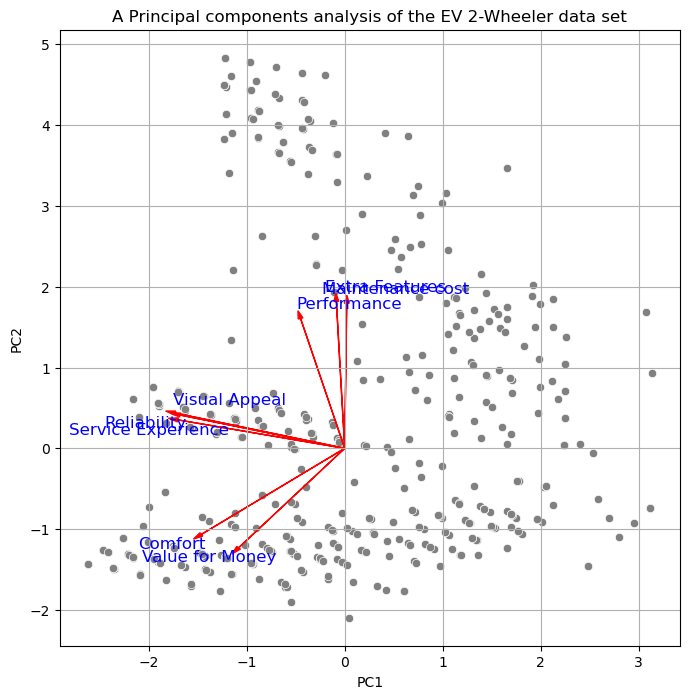

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))

index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey', ax=ax)

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings)):
    # Calculate position for text label
    text_x = factor_loadings['PC1'][i] * 3.5
    text_y = factor_loadings['PC2'][i] * 3.5
    # Add a small offset to avoid overlapping
    if i % 2 == 0:
        text_x += 0.5
        text_y += 0.2
    else:
        text_x -= 0.3
        text_y -= 0.1
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(text_x, text_y, index_names[i], fontsize=12, ha='center', color='blue', va='center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.show()


In [42]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]

In [43]:
""" calculates the Within-Cluster-Sum-of-Squares for each k_means clustering model.which represents 
the sum of squared distances of samples to their closest cluster center."""

wcss = [model.inertia_ for model in data_km28]

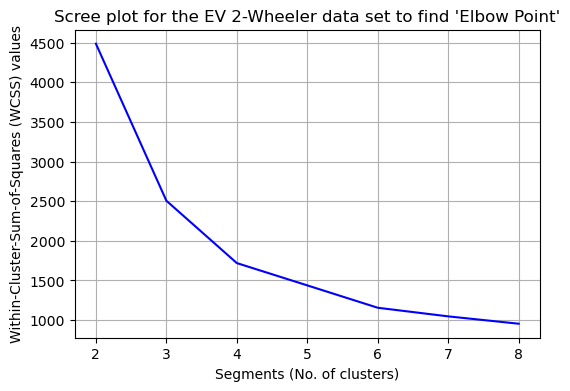

In [44]:
fig = plt.figure(figsize = (6,4))
sns.lineplot(x = list(range(2, 9)), y = wcss, color = 'blue')
plt.xlabel("Segments (No. of clusters)")
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS) values')
plt.title("Scree plot for the EV 2-Wheeler data set to find 'Elbow Point'")
plt.grid(True)
plt.show()

In [45]:
wcss_diff = pd.DataFrame({'Segments(No. of clusters)':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()})
wcss_diff['WCSS Difference'][0] = 0

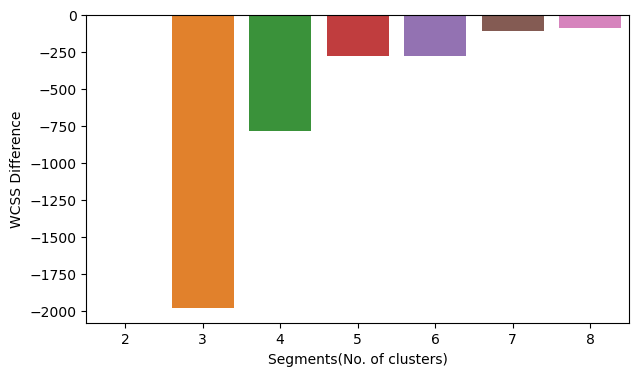

In [46]:
plt.figure(figsize = (7, 4))
sns.barplot(wcss_diff, x = 'Segments(No. of clusters)', y = 'WCSS Difference')
plt.show()

*The decision-making process heavily relied on the insights gained from the scree plot depicted above. It unveiled a noticeable **elbow at four segments**, indicating a substantial decrease in distances. **This pivotal point suggested the optimal number of segments for our analysis**.*

In [47]:
kmeans = data_km28[2]

In [48]:
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_
data_clust.head()

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,cluster
0,-0.174248,0.631486,-0.72701,-1.379209,-0.448898,0.815282,-0.472806,-0.285153,3
1,-0.174248,-0.962653,-0.72701,-0.852727,-0.448898,0.335437,-0.472806,0.728191,3
2,0.389221,0.631486,-0.72701,-0.326244,-0.448898,1.295127,-0.472806,0.221519,1
3,-1.301187,-0.962653,-0.72701,-0.852727,-0.448898,-0.624254,-0.472806,-0.285153,3
4,-0.174248,0.631486,-0.72701,-0.852727,-0.448898,0.335437,-0.472806,0.221519,1


In [49]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cluster
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827,3
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917,3
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738,1
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328,3
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972,1


# Profiling Segments

In [50]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_
data_profile.head()

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,cluster
0,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,3
1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,3
2,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3
4,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,1


In [51]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T
data_pivot

cluster,0,1,2,3
Visual Appeal,4.472727,4.339350,4.519685,1.590909
Reliability,4.227273,4.036101,4.007874,0.851515
Performance,4.336364,0.000000,4.385827,0.554545
Service Experience,3.909091,3.870036,3.629921,0.751515
Extra Features,3.900000,0.000000,0.015748,0.339394
Comfort,0.000000,4.259928,4.133858,0.718182
Maintenance cost,4.154545,0.000000,0.000000,0.466667
Value for Money,0.000000,4.115523,0.000000,0.542424


In [52]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

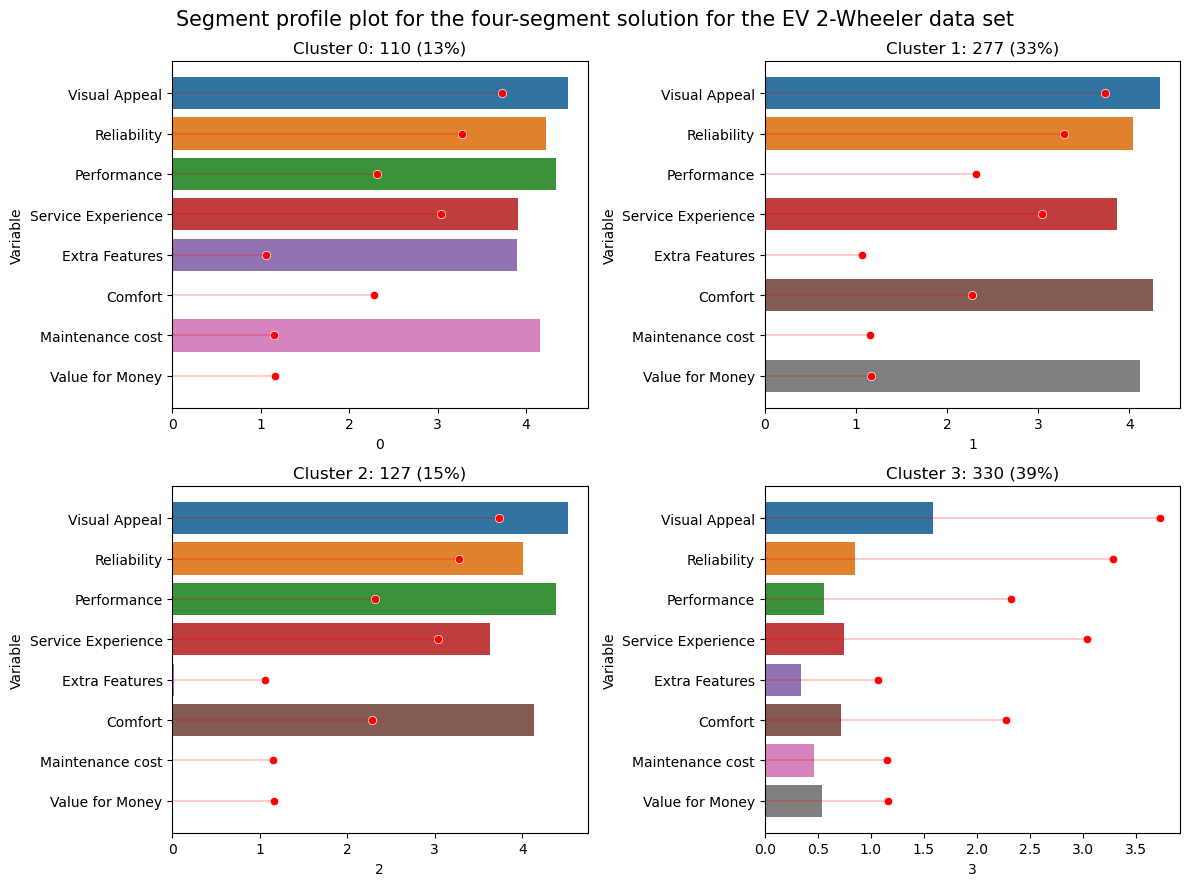

In [53]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.show()

*The visual representation above encapsulates the varying perspectives among different segments. Beginning with **Segment 0, the smallest group comprising 13% of consumers**, there is a notable appreciation for visual appeal, reliability, performance, service experience, extra features, and maintenance cost. Moving to **Segment 1, representing 33% of consumers**, there is a similar appreciation for visual appeal, reliability, service experience, and comfort, with a significant emphasis on perceiving strong value for money. **Segment 2, comprising 15% of consumers**, places high value on visual appeal, reliability, performance, service experience, and comfort. Conversely, **Segment 3, the largest segment consisting of 39% of consumers**, expresses dissatisfaction across all aspects, making them the largest but least satisfied group. This segmentation highlights distinct perceptions, particularly regarding features and costs.*

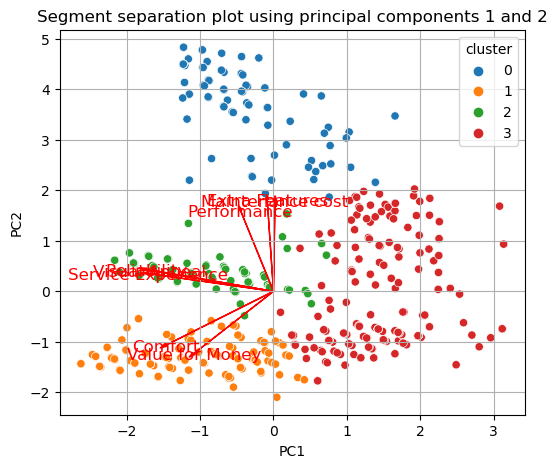

In [88]:
fig, ax = plt.subplots(figsize=(6,5))

# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10',ax=ax)

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()

*Above Figure, utilizing principal components, further emphasizes the differences among segments. Notably, **Segment 3, despite being the largest segment, lacks specific opinions, making them unique in their lack of satisfaction.***

# Describing Segments

In [55]:
data_desc = data.copy()
data_desc['cluster'] = kmeans.labels_

In [56]:
data_desc.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'cluster'],
      dtype='object')

In [57]:
data_desc.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,positive,3
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative,3
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive,1
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,positive,3
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative,1


sentiment  negative  neutral  positive
cluster                               
0                11        0        99
1                19       39       219
2                 6        4       117
3               169        9       152


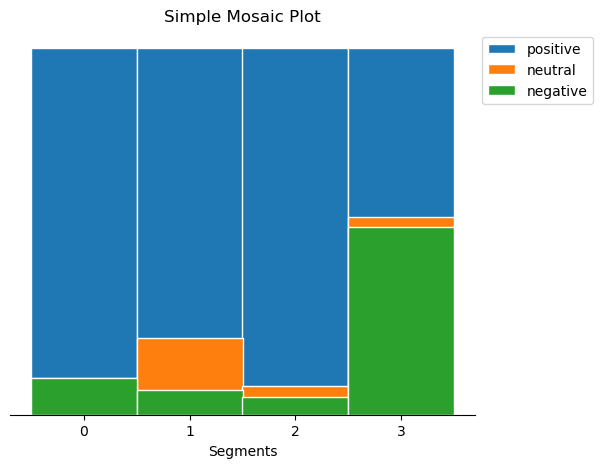

In [58]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot"):
    
    fig, ax = plt.subplots(figsize =figsize)
    
    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    
    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
        
    x = [str(n) for n in ratio_cum_df.index.tolist()]
    
    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
        
    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    

    # Configure title and axis
    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()
    
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

sentiment_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['sentiment'])
print(sentiment_cluster)

mosaicplot(sentiment_cluster, color_list[:3], figsize=(6,5), barwidth = 1)


*The above mosaic plot delves into consumer sentiments, uncovering that all segments, except **Segment 3**, demonstrate positive sentiments. Conversely, consumers in **Segment 3 are notable for expressing negative sentiments, suggesting dissatisfaction across various aspects**. This analysis sheds light on the distinct sentiment patterns within each segment, providing valuable insights into consumer perceptions and preferences.*

In [59]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Used it for'])

In [60]:
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,87,19,2,1,1
1,194,55,7,19,2
2,75,39,4,9,0
3,244,47,7,27,5


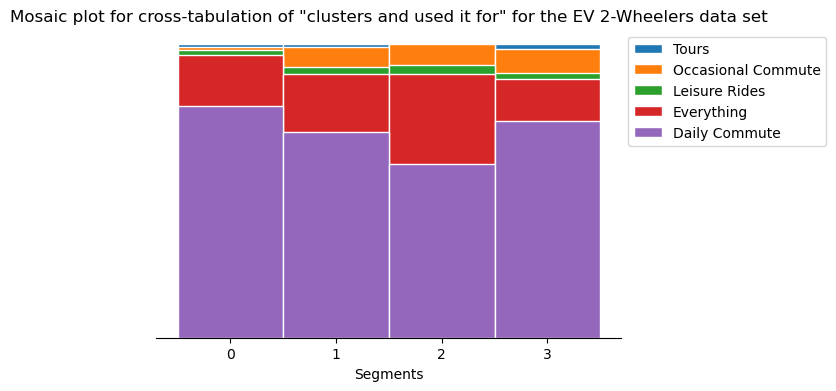

In [89]:
mosaicplot(used_cluster, color_list[:5], figsize=(6,4), barwidth = 1, title = 'Mosaic plot for cross-tabulation of "clusters and used it for" for the EV 2-Wheelers data set' )

*The above mosaic plot illustrates that all segments primarily utilize electric vehicles for daily commuting, with **limited usage for tours, occasional commuting, and leisure rides**. This analysis highlights the commonality in the usage pattern across different segments, **emphasizing the predominant role of electric vehicles in daily transportation needs.***

In [62]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Owned for'])

In [63]:
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,14,14,43,20,19,0
1,41,51,79,56,50,0
2,16,14,31,10,56,0
3,40,55,67,117,50,1


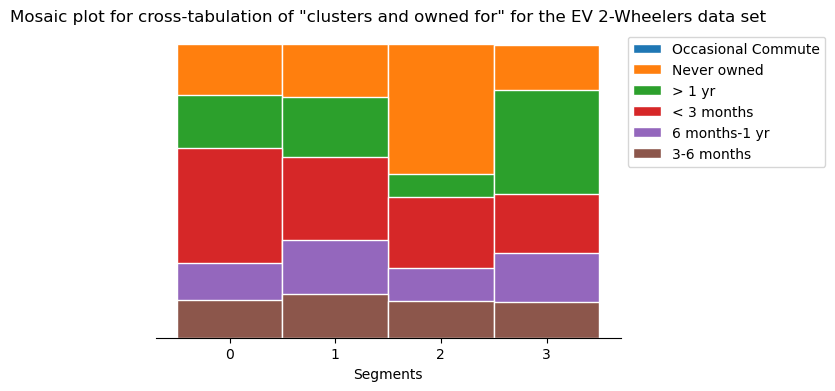

In [90]:
mosaicplot(owned_cluster, color_list[:6], figsize=(6,4), barwidth = 1, title = 'Mosaic plot for cross-tabulation of "clusters and owned for" for the EV 2-Wheelers data set' )

*Above mosaic plot delineates the ownership duration of electric vehicles among segments. **Segment 3 stands out, owning electric vehicles for more than a year, while Segment 2 has no prior ownership experience. Segment 1 members moderately own vehicles ranging from less than 3 months to over a year, and Segment 0 consumers have owned electric vehicles for a few days to less than 3 months.***

In [65]:
ridden_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Ridden for'])

In [66]:
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,5,18,63,5,0
1,11,44,158,14,0
2,1,15,54,1,0
3,15,61,184,18,1


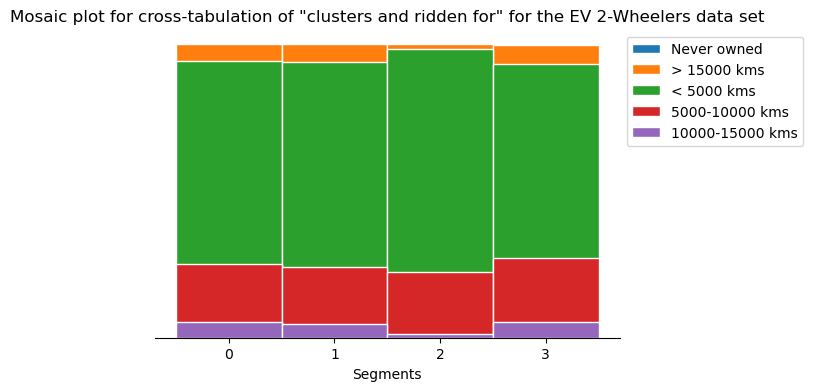

In [91]:
mosaicplot(ridden_cluster, color_list[:5], figsize=(6,4), barwidth = 1, title = 'Mosaic plot for cross-tabulation of "clusters and ridden for" for the EV 2-Wheelers data set' )

*The mosaic plot above examines the distances covered by consumers, revealing that all segments primarily utilize electric vehicles for commuting, with **the majority of users covering distances below 5000 kilometers**. **A small portion falls within the range of 5000 to 10000 kilometers**, which aligns with their commuting needs. This analysis underscores the prevalent usage of electric vehicles for daily commuting purposes across different segments.*

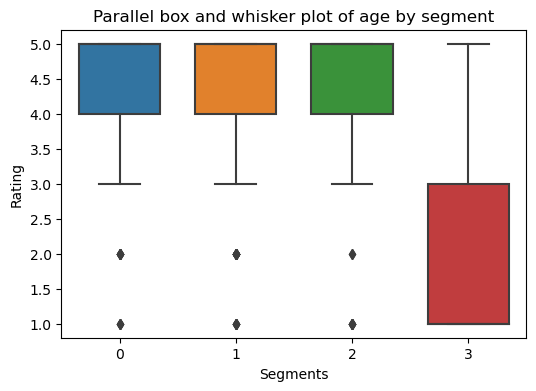

In [68]:
# Number of cluster along the x-axis and rating along the y-axis
plt.figure(figsize = (6,4))
sns.boxplot(data_desc, x= 'cluster', y = 'rating', palette = 'tab10', width = 0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.savefig("rating.png")
plt.show()

*The parallel box and whisker plot above highlight substantial differences in average ratings among segments. Particularly, consumers in **Segment 3 exhibit dissatisfaction across all perceptions, resulting in lower overall ratings.** This visualization underscores the varying perceptions and satisfaction levels among different segments of consumers.*

In [69]:
data_desc.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,positive,3
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative,3
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive,1
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,positive,3
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative,1


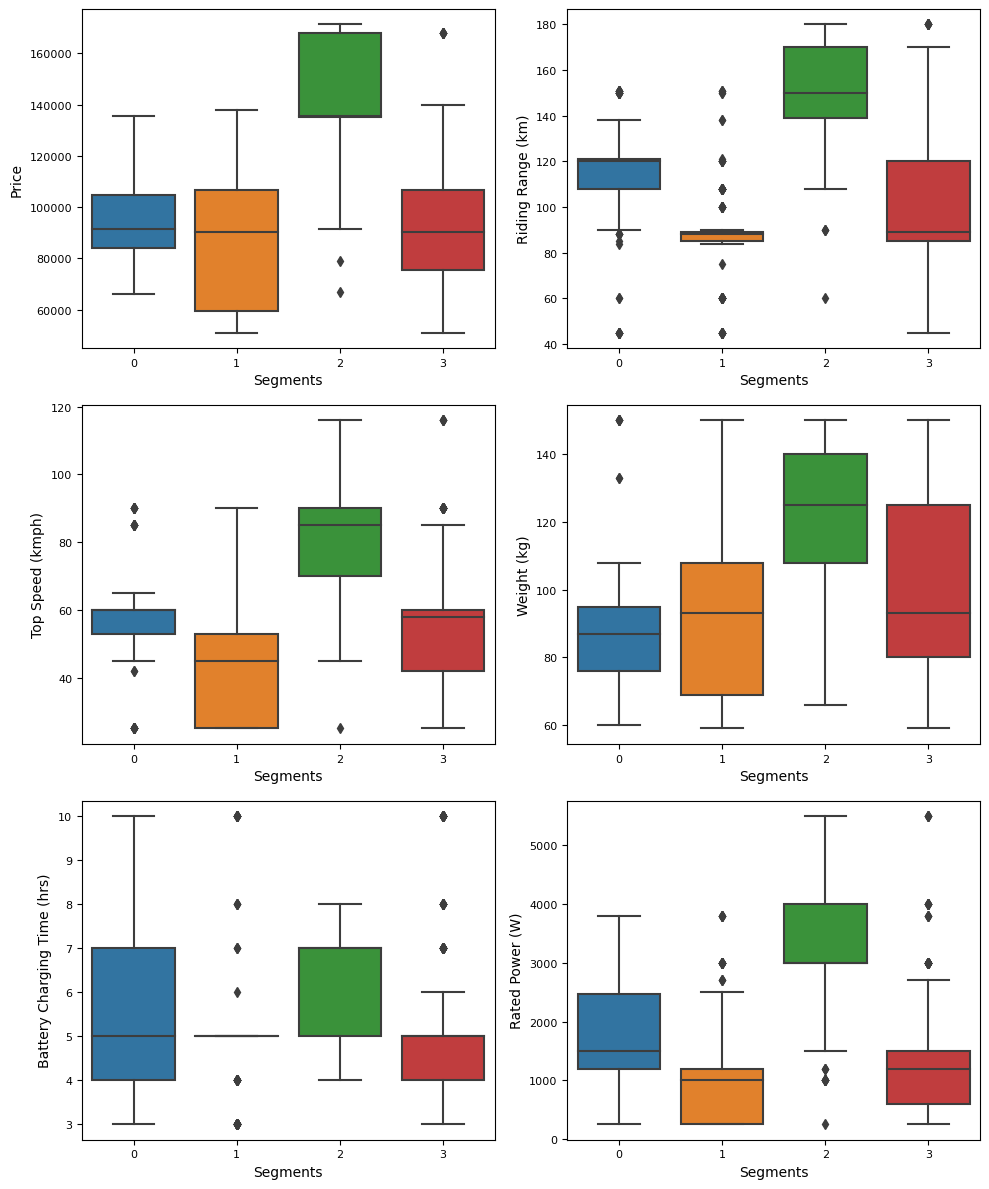

In [70]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(data_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data_desc, x = 'cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

*Analyzing the technical specifications of electric vehicles across different segments reveals distinct patterns. **Segment 2 exhibits a preference for premium EVs characterized by a higher price range and extended riding range, reflecting consumer inclination towards luxury and long-distance travel**. In contrast, **Segment 3 gravitates towards budget-friendly options with lower prices and moderate riding ranges, ideal for daily commuting**. Both **Segment 0 and Segment 1 prioritize affordability, albeit with slight variations in riding range and speed preferences**. Weight preferences diverge, with **Segment 2 and Segment 3 showing a preference for heavier vehicles**, while **Segment 0 and Segment 1 lean towards lighter options**. Additionally, charging time preferences vary, with **Segment 2 and Segment 0 opting for longer durations for overnight charging**, while **Segment 1 and Segment 3 prioritize faster charging for quick turnaround times**. These nuanced preferences collectively shape the electric vehicle market landscape in India.*

# Selection of Target Segment

*In the electric vehicle market, the strategic focus lies on two key segments: **Segment 1, representing 33% of consumers, and Segment 3, representing 39% of consumers**. **Segment 1 prioritizes visual appeal, reliability, service experience, and comfort, suggesting an opportunity to tailor electric vehicles to meet these preferences while emphasizing their value for money**. On the other hand, **Segment 3 exhibits diverse preferences and areas of dissatisfaction, offering a chance to enhance customer satisfaction and loyalty by directly addressing their specific needs. By targeting the dissatisfaction points in Segment 3 and amplifying the positive aspects in Segment 1**, the strategy aims to align electric vehicles with the unique expectations of each segment, thereby securing a competitive edge and fostering continuous market expansion.*

# Customizing the Marketing Mix














*In our electric vehicle market strategy, the customization of the marketing mix plays a pivotal role in appealing to our target segments, Segment 1 and Segment 3.*

* Product customization entails enhancing features to cater to specific desires, addressing dissatisfaction points for Segment 3, and highlighting visual appeal and value for money for Segment 1. We offer diverse options to accommodate varied tastes and budgets within each segment. 
* Price customization involves competitive pricing for Segment 1 and a slightly elevated price point for value-added features in Segment 3. 
* Promotion customization is centered on targeted advertising and tailored promotional events that align with the preferences of each segment. 
* Place customization focuses on establishing accessible distribution channels in urban areas for Segment 3 and in suburban/semi-urban regions for Segment 1. Additionally, we prioritize a robust online presence and efficient customer support. 
* People and Process Customization entails training customer service representatives to address segment-specific concerns and ensuring streamlined processes for customization requests and service appointments. 

*This tailored approach ensures that our electric vehicles resonate with the distinct needs of Segment 1 and Segment 3, ultimately boosting market relevance and customer preference.*

# Potential Early Market Customer Base

*In the analysis of the early market customer base, two primary segments are identified: **Segment 1 with 277 members (33% of consumers) and  Segment 3 with 330 members (39% of consumers)**. The target price range for **Segment 1, it ranges from ₹51,094 to ₹1,37,890 and for Segment 3 falls between ₹51,094 and ₹1,67,844**. By multiplying the number of potential customers in each segment by the targeted price range, potential profits can be calculated. For example, with a **target price of ₹1,30,000 for Segment 3, the potential revenue amounts to be ₹4.29 crores**, and for **Segment 1 with a target price of ₹1,15,000, the potential revenue is ₹3.2 crores (approx.)**. Segment 3, being larger in potential market share, is the primary focus for early market penetration efforts due to its significant profit opportunity.

# Most Optimal Market Segments

*Following in-depth analysis and assessment, **Segment 3, comprising 39% of consumers**, emerges as the prime market segment for electric two-wheeler vehicles. With its sizable customer base and a well-rounded combination of technical specifications and price range, this segment presents significant market potential. The recommended technical specifications for Segment 3 encompass a **price range spanning from ₹70,688 to ₹1,29,063**, a **riding range of 89 to 180 km**, a **top speed ranging from 58 to 116 kmph**, a **weight between 76 to 120 kg**, a **battery charging time of 3 to 5 hours**, and a rated **power ranging from 1200 to 5500 W**. This targeted strategy ensures alignment with the diverse needs and preferences of the market, establishing a robust groundwork for a prosperous and enduring foray into the electric vehicle market.*

# Conclusion

*In conclusion, our extensive analysis of India's electric vehicle market has led us to pinpoint Segment 3 as the ideal target. With a substantial 39% share of consumers, this segment presents a significant market opportunity. By customizing our electric two-wheeler specifications to cater to the preferences of this segment, we guarantee that our products seamlessly align with the needs of a large customer base. This strategic choice is informed by a comprehensive understanding of market segmentation, consumer behavior, and technical requirements.
These insights provide clear guidance for our market entry, emphasizing accuracy and relevance in both product development and marketing strategies. Going forward, this approach provides us with a solid footing, ensuring that our offerings resonate effectively within the dynamic landscape of India's electric vehicle market.*